# Sloan Digital Sky Survey:
The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

In [59]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import warnings:
import warnings
warnings.filterwarnings('ignore')

In [60]:
#Reading the Dataset:
df = pd.read_csv('spacedata.csv')
print(df.shape) #checking no of rows and columns in the dataset.
df.head()

(10000, 18)


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [61]:
#Checking datatypes:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [62]:
#Checking for categorical columns:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
print("Categorical Columns:",cat_col)

Categorical Columns: ['class']


In [63]:
#Checking the value count and unique value of each categorical feature:
for col in df.columns:
    if df[col].dtypes == object:
        print(str(col)+':'+str(df[col].unique()))
        print(df[col].value_counts())
        print('********************************************')

class:['STAR' 'GALAXY' 'QSO']
GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64
********************************************


           Total Missing Value
objid                        0
ra                           0
dec                          0
u                            0
g                            0
r                            0
i                            0
z                            0
run                          0
rerun                        0
camcol                       0
field                        0
specobjid                    0
class                        0
redshift                     0
plate                        0
mjd                          0
fiberid                      0


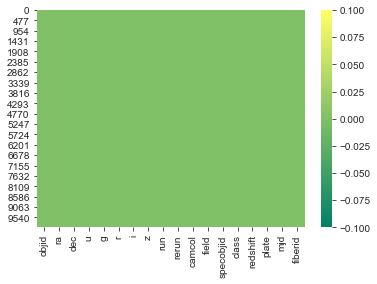

In [64]:
#Checking the null values in the dataset:
missing_value = pd.DataFrame(df.isnull().sum(),columns=['Total Missing Value'])
print(missing_value)
sns.heatmap(df.isnull(),cmap='summer')

In [65]:
#Dropping the unnecessary and useless columns:
df = df.drop(['objid','rerun','specobjid','fiberid'], axis=1)

In [66]:
#checking the Columns:
columns = list(df.columns)
print(df.shape)
print(columns)

(10000, 14)
['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field', 'class', 'redshift', 'plate', 'mjd']


Statistical Analysis:

In [67]:
#Doing Statistical Analysis by using Describe Function
#Checking interquantile range.
#Checking mean median mode
df.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,0.143726,1460.986400,52943.533300
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,0.388774,1788.778371,1511.150651
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,-0.004136,266.000000,51578.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,0.000081,301.000000,51900.000000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,0.042591,441.000000,51997.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,0.092579,2559.000000,54468.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,5.353854,8410.000000,57481.000000


In [68]:
#There is possibility of presence of outliers as mean of some features are greater than median.
#In some of features theres an huge difference between 75% and max which confirm the presence of outliers.

Exploratory Data Analysis

1.Univarite Analysis

2.Multivariate Analysis

3.Bivariate Analysis

4.Here we check the relationship between different independant and dependant variable.

Total no of stars:4998
Total no of galaxy:4152
Total no of qso:850


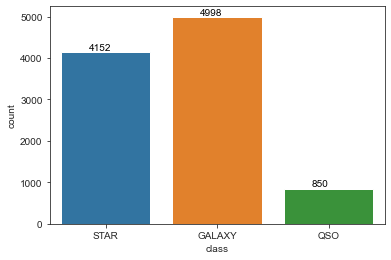

In [69]:
#Univariate Analysis:
#Checking Count of Target Varibale:
sns.set_style('ticks')
ax = sns.countplot(df['class'])
star, galaxy, qso = df['class'].value_counts()
print("Total no of stars:{}".format(star))
print("Total no of galaxy:{}".format(galaxy))
print("Total no of qso:{}".format(qso))
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

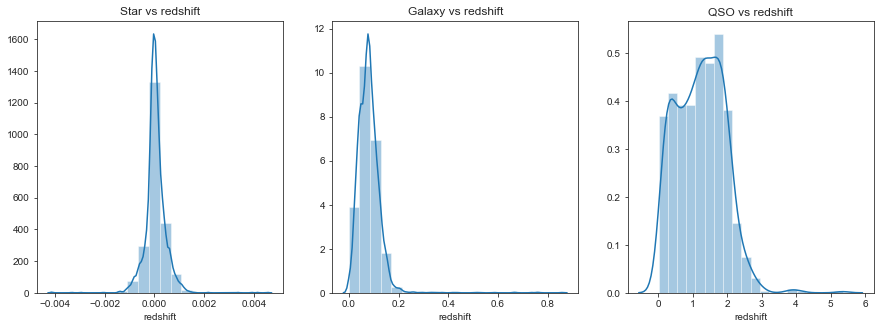

In [70]:
#Univarite Analysis checking the distribution of class variable respective to redshift:
#In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))
ax = sns.distplot(df[df['class']=='STAR']['redshift'], bins = 20, ax = axes[0], kde = True)
ax.set_title('Star vs redshift')
ax = sns.distplot(df[df['class']=='GALAXY']['redshift'], bins = 20, ax = axes[1], kde = True)
ax.set_title('Galaxy vs redshift')
ax = sns.distplot(df[df['class']=='QSO']['redshift'], bins = 20, ax = axes[2], kde = True)
ax = ax.set_title('QSO vs redshift')

In [71]:
#Here we can observe the redshif for stars are somehow normally distributed.
#redshift for Galaxy and QSO are somehow positive skewed / right skewed.

In [72]:
#objid = Object Identifier
#ra = J2000 Right Ascension (r-band)
#dec = J2000 Declination (r-band)

Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.

class,GALAXY,QSO,STAR
dec,,,
-5.382632,0.0,0.0,1.0
-5.378794,1.0,0.0,0.0
-5.371988,1.0,0.0,0.0
-5.354572,1.0,0.0,0.0
-5.349621,1.0,0.0,0.0


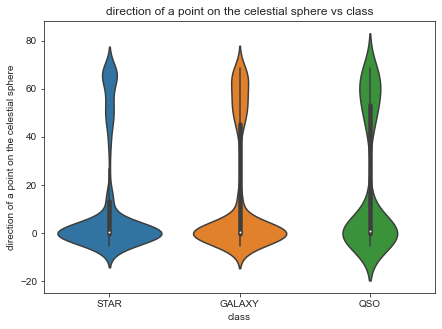

In [73]:
#Bivariate Analysis:
#Checking relationship between dec and class:
plt.figure(figsize=(7,5))
sns.violinplot(x='class',y='dec',data=df)
plt.xlabel('class')
plt.ylabel('direction of a point on the celestial sphere')
plt.title('direction of a point on the celestial sphere vs class')
pd.crosstab(index=df['dec'],columns=df['class'],normalize='index').head()

class,GALAXY,QSO,STAR
ra,,,
8.235100,0.0,0.0,1.0
8.245963,0.0,0.0,1.0
8.291367,1.0,0.0,0.0
8.386869,0.0,0.0,1.0
8.487886,0.0,0.0,1.0


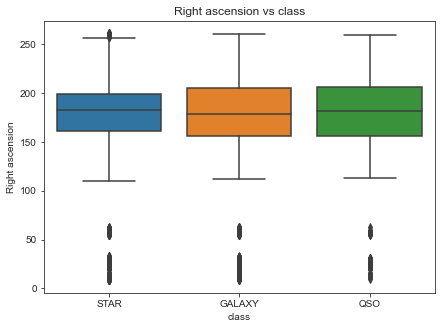

In [74]:
#Bivariate Analysis:
#Checking relationship between Right ascension and class:
plt.figure(figsize=(7,5))
sns.boxplot(x='class',y='ra',data=df)
plt.xlabel('class')
plt.ylabel('Right ascension')
plt.title('Right ascension vs class')
pd.crosstab(index=df['ra'],columns=df['class'],normalize='index').head()

In [17]:
#Checking the coerelation:
#how the different neumerical features are corelated to each other 
#Their strength of relationship
#Their influence on target variable.

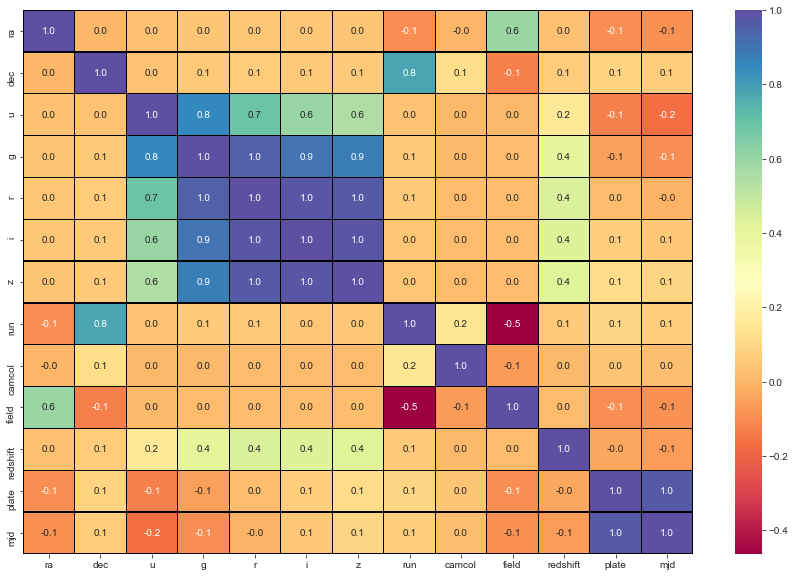

In [18]:
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt=".1f",linewidths=.2,cmap="Spectral",ax=ax,linecolor="black")
plt.show()

In [19]:
#Here we can see that some of the features are highly corealted with each hence these both feature will act as same.
#u , g , r, i, z represent the response of the 5 bands of the telescope and we can see they are highly corealated with each other.
# so as these features are highly corelated with each other they can behave as duplicate feature.

In [20]:
#using Label Encoder to convert Categorical data into neumeric:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ["class"]
for col in columns:
    df[col] = le.fit_transform(df[col])

In [21]:
#Let check wheather any outliers are present or not and if yes lets normalize them:
from scipy.stats import zscore
zscore = abs(zscore(df))
print("Before removal of outliers:",df.shape)
df_final = df.loc[(zscore<3).all(axis=1)]
print("After removal of outliers:",df_final.shape)

Before removal of outliers: (10000, 14)
After removal of outliers: (8713, 14)


In [22]:
#Checking for skewness:
#whether the features are right or left skewed.
#for right and left skewed we can use logarthim transformation.
#if the skewness value is greater than o.55 then the features are skewed.

In [23]:
df_final.skew()

ra         -0.131080
dec         1.214165
u          -0.982213
g          -0.528614
r          -0.151366
i           0.059073
z           0.170787
run         0.517015
camcol     -0.143107
field       0.220889
class       0.289700
redshift    4.949300
plate       1.315894
mjd         0.959917
dtype: float64

In [24]:
import scipy.stats as stat
import pylab

In [25]:
#If you want to check whether feature is guassian or normal distributed
# Q-Q plot is used to check wheather the data are normally distributed or not by graphically.
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df_final[feature],dist='norm',plot=pylab)
    plt.show()

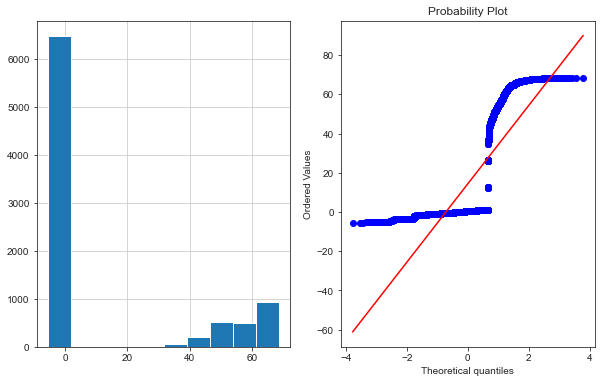

In [26]:
#checking distribution for dec:
plot_data(df_final,'dec')

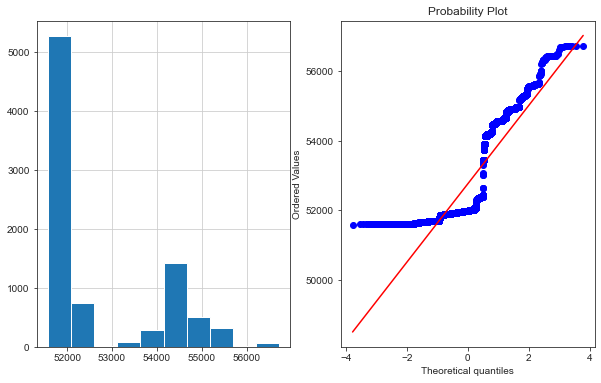

In [56]:
#checking distribution for mjd:
plot_data(df_final,'mjd')

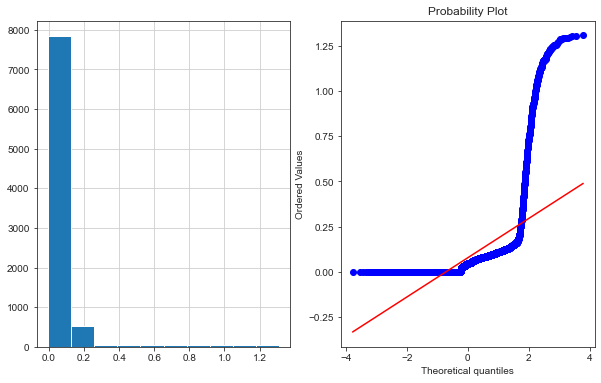

In [57]:
#checking distribution for redshift:
plot_data(df_final,'redshift')

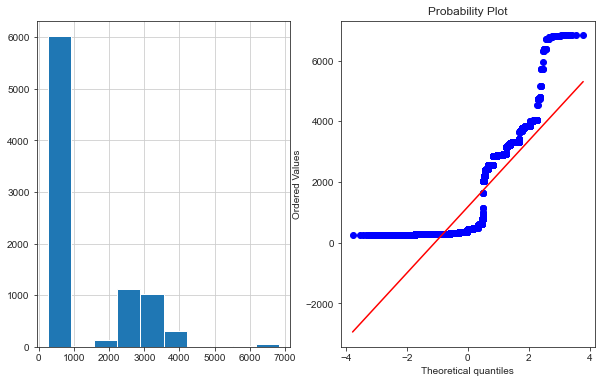

In [58]:
#checking distribution for plate:
plot_data(df_final,'plate')

In [27]:
#We can clearly see data points are not been normally distributed.
#All of them are right skewed.
#for skewed data logarthim transformation will work fine.

In [28]:
for col in df_final.columns:
    if col!= 'class':
        if df.skew().loc[col]>0.55:
            df[col] = np.log1p(df[col])

In [29]:
#Let Separate the input and output variable:
#Let select input and output value:
X = df_final.drop('class',axis=1)
y = df_final['class']
print('shape of X is {}'.format(X.shape))
print('shape of y is {}'.format(y.shape))

shape of X is (8713, 13)
shape of y is (8713,)


In [30]:
#Breaking the model into training and testing split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
#Lets check for corelation again and remove highly corelated feature as discussed above:

In [32]:
corrmat = X_train.corr()

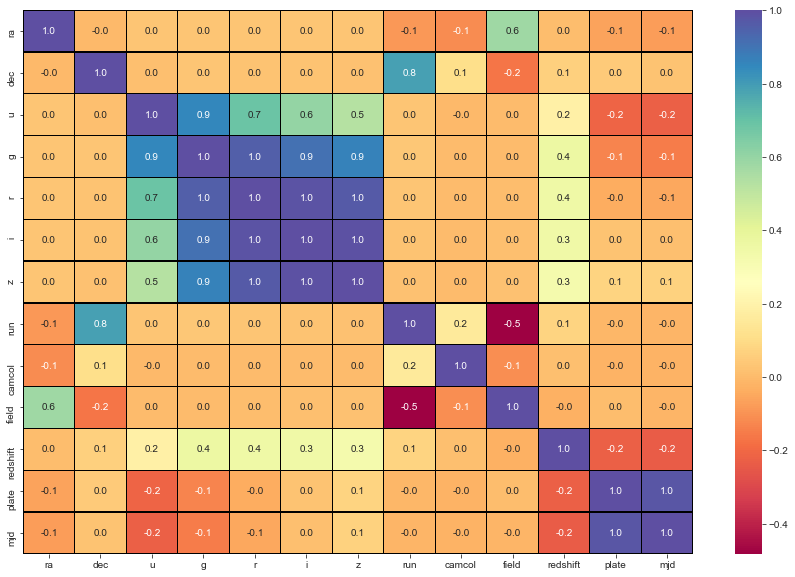

In [33]:
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(corrmat,annot=True,fmt=".1f",linewidths=.2,cmap="Spectral",ax=ax,linecolor="black")
plt.show()

In [34]:
#Lets define a function and set a minimum threshold value to tackle the highly corelated feature:
def get_corelations(data, threshold):
    corr_col = set()  
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [35]:
corr_features = get_corelations(X_train, 0.85)
len(set(corr_features))

5

In [36]:
#Dropping the highly corelated columns:
X_train_uncorr = X_train.drop(labels=corr_features,axis=1)
X_test_uncorr =  X_test.drop(labels=corr_features,axis=1)

In [37]:
X_train_uncorr.shape, X_test_uncorr.shape

((6970, 8), (1743, 8))

In [38]:
#Redefining traing and testing data:
X_train_uncorr, X_test_uncorr, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
#Using StandardScaler to Preprocess the data:
#StandardScaler is used to bring the datapoints to standard normal distribution where mean = 0 and SD(+-)1:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_uncorr)
X_train_uncorr = scaler.transform(X_train_uncorr)
X_test_uncorr = scaler.transform(X_test_uncorr)

In [40]:
#Importing Models for Predictions:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [41]:
model = [LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(X_train_uncorr,y_train)
    print("Score of",m, "is:",m.score(X_train_uncorr,y_train))
    y_predict= m.predict(X_test_uncorr)
    print("accuracy_score:",accuracy_score(y_test,y_predict))
    score = cross_val_score(m,X,y,cv=5,scoring='accuracy').mean()
    print("Cross validation is",np.mean(score)*100)
    print(confusion_matrix(y_test,y_predict))
    print(classification_report(y_test,y_predict))
    print(confusion_matrix(y_test,y_predict))
    print('******************************************************************')
    print('\n')

Score of LogisticRegression() is: 0.982209469153515
accuracy_score: 0.9856569133677567
Cross validation is 82.54341294981467
[[928   3  14]
 [  8  69   0]
 [  0   0 721]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       945
           1       0.96      0.90      0.93        77
           2       0.98      1.00      0.99       721

    accuracy                           0.99      1743
   macro avg       0.98      0.96      0.97      1743
weighted avg       0.99      0.99      0.99      1743

[[928   3  14]
 [  8  69   0]
 [  0   0 721]]
******************************************************************


Score of SVC() is: 0.9766140602582496
accuracy_score: 0.9747561675272519
Cross validation is 82.57783635773205
[[916   3  26]
 [  9  68   0]
 [  6   0 715]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       945
           1       0.96      0.88      0.92        77
           2 

In [42]:
#We are getting Similar Score on every model Lets Implement Logistic Regression with Cross Validation and check the accuracy:

In [52]:
#Implementing Algorithim
model = LogisticRegression()
model.fit(X_train_uncorr,y_train)

LogisticRegression()

In [53]:
#Performing Hyperparametre Tuning
param_grid = {'C': np.logspace(-3, 3, 10),'penalty':['l2','l1']}  

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=5,verbose=0,n_jobs=-1)

In [54]:
grid_search.fit(X_train_uncorr,y_train)
grid_search.best_params_

{'C': 1000.0, 'penalty': 'l2'}

In [55]:
grid_search.best_score_

0.9898134863701579

accuracy_score: 0.9913941480206541
[[936   4   5]
 [  5  72   0]
 [  1   0 720]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       945
           1       0.95      0.94      0.94        77
           2       0.99      1.00      1.00       721

    accuracy                           0.99      1743
   macro avg       0.98      0.97      0.98      1743
weighted avg       0.99      0.99      0.99      1743



Text(0.5, 16.0, 'Predicted label')

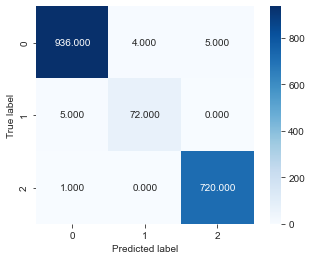

In [46]:
model = LogisticRegression(C=1000.0,penalty='l2')
model.fit(X_train_uncorr,y_train)
y_predict= model.predict(X_test_uncorr)
print("accuracy_score:",accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, annot_kws={"size":10}, cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

Saving best model for future analysis:
    

In [47]:
import joblib
joblib.dump(model,'model.obj')
model_from_joblib = joblib.load('model.obj')
model_from_joblib.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])